# Visualizing Multidimensional Clusters

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/adult_data_RenameCol_MinMax_LE.csv')
df_orig = df.copy()
dfy = df['class']
dfy

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: class, Length: 32560, dtype: int64

In [3]:
df = df[:500]
dfy = dfy[:500]
print(df.shape)
df.head()


(500, 16)


,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,0,0.452055,0.048052,0.800000,0.0,0.0,0.122449,6,9,2,4,0,4,1,39,0
1,1,0.287671,0.137581,0.533333,0.0,0.0,0.397959,4,11,0,6,1,4,1,39,0
2,2,0.493151,0.150486,0.400000,0.0,0.0,0.397959,4,1,2,6,0,2,1,39,0
3,3,0.150685,0.220635,0.800000,0.0,0.0,0.397959,4,9,2,10,5,2,0,5,0
4,4,0.273973,0.184219,0.866667,0.0,0.0,0.397959,4,12,2,4,5,4,0,39,0


In [4]:
#exclude the categorical column and the college names
features = df.drop(['class', 'Unnamed: 0'],axis=1)

**Normalization**

Note that the different categories have different ranges. If we don't normalize them, then columns with wider ranges will have disproportionate contributions to cluster separations.

In [5]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [6]:
pd.DataFrame(features_normal).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.287014,0.172846,0.604533,0.016433,0.044678,0.397814,0.543429,0.688400,0.422667,0.484286,0.293600,0.905500,0.668000,0.937436
std,0.184474,0.113869,0.173139,0.077583,0.182233,0.121603,0.213333,0.254426,0.244325,0.306531,0.326331,0.219753,0.471403,0.206374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.094322,0.533333,0.000000,0.000000,0.402062,0.571429,0.600000,0.333333,0.214286,0.000000,1.000000,0.000000,1.000000
50%,0.260274,0.160862,0.600000,0.000000,0.000000,0.402062,0.571429,0.733333,0.333333,0.500000,0.200000,1.000000,1.000000,1.000000
75%,0.397260,0.227956,0.733333,0.000000,0.000000,0.404639,0.571429,0.800000,0.666667,0.714286,0.600000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all of our variables are scaled to be distributed between 0 and 1.

**<font size=5>K-Means Clustering</font>**

In [7]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

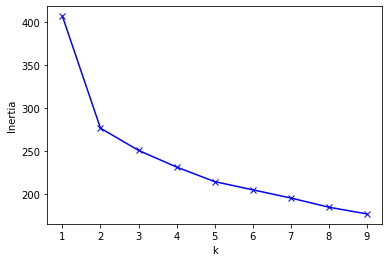

In [8]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4).fit(features_normal)

In [10]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledC = pd.concat((features,labels),axis=1)
labeledC = labeledC.rename({0:'labels'},axis=1)

In [11]:
labeledC.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,labels
0,0.452055,0.048052,0.800000,0.0,0.0,0.122449,6,9,2,4,0,4,1,39,3
1,0.287671,0.137581,0.533333,0.0,0.0,0.397959,4,11,0,6,1,4,1,39,3
2,0.493151,0.150486,0.400000,0.0,0.0,0.397959,4,1,2,6,0,2,1,39,3
3,0.150685,0.220635,0.800000,0.0,0.0,0.397959,4,9,2,10,5,2,0,5,2
4,0.273973,0.184219,0.866667,0.0,0.0,0.397959,4,12,2,4,5,4,0,39,2


In [12]:
labeledC = pd.concat([labeledC, dfy],axis=1)
labeledC

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,labels,class
0,0.452055,0.048052,0.800000,0.0,0.0,0.122449,6,9,2,4,0,4,1,39,3,0
1,0.287671,0.137581,0.533333,0.0,0.0,0.397959,4,11,0,6,1,4,1,39,3,0
2,0.493151,0.150486,0.400000,0.0,0.0,0.397959,4,1,2,6,0,2,1,39,3,0
3,0.150685,0.220635,0.800000,0.0,0.0,0.397959,4,9,2,10,5,2,0,5,2,0
4,0.273973,0.184219,0.866667,0.0,0.0,0.397959,4,12,2,4,5,4,0,39,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.041096,0.169448,0.600000,0.0,0.0,0.397959,4,15,4,7,3,4,1,39,0,0
496,0.082192,0.264406,0.133333,0.0,0.0,0.397959,4,4,4,8,3,4,1,8,0,0
497,0.123288,0.035185,0.600000,0.0,0.0,0.346939,4,15,4,10,1,4,0,39,2,0
498,0.753425,0.197077,0.533333,0.0,0.0,0.193878,0,11,2,0,0,4,1,39,3,0


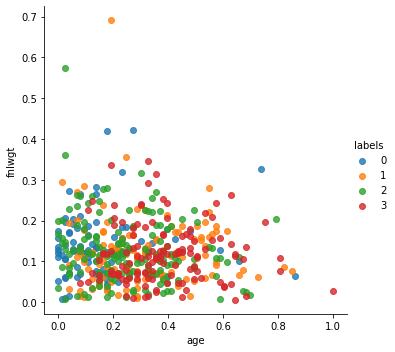

In [14]:
sns.lmplot(x='age',y='fnlwgt',data=labeledC,hue='labels',fit_reg=False)

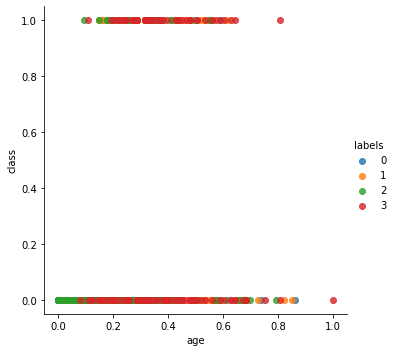

In [15]:
sns.lmplot(x='age',y='class',data=labeledC,hue='labels',fit_reg=False)

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping

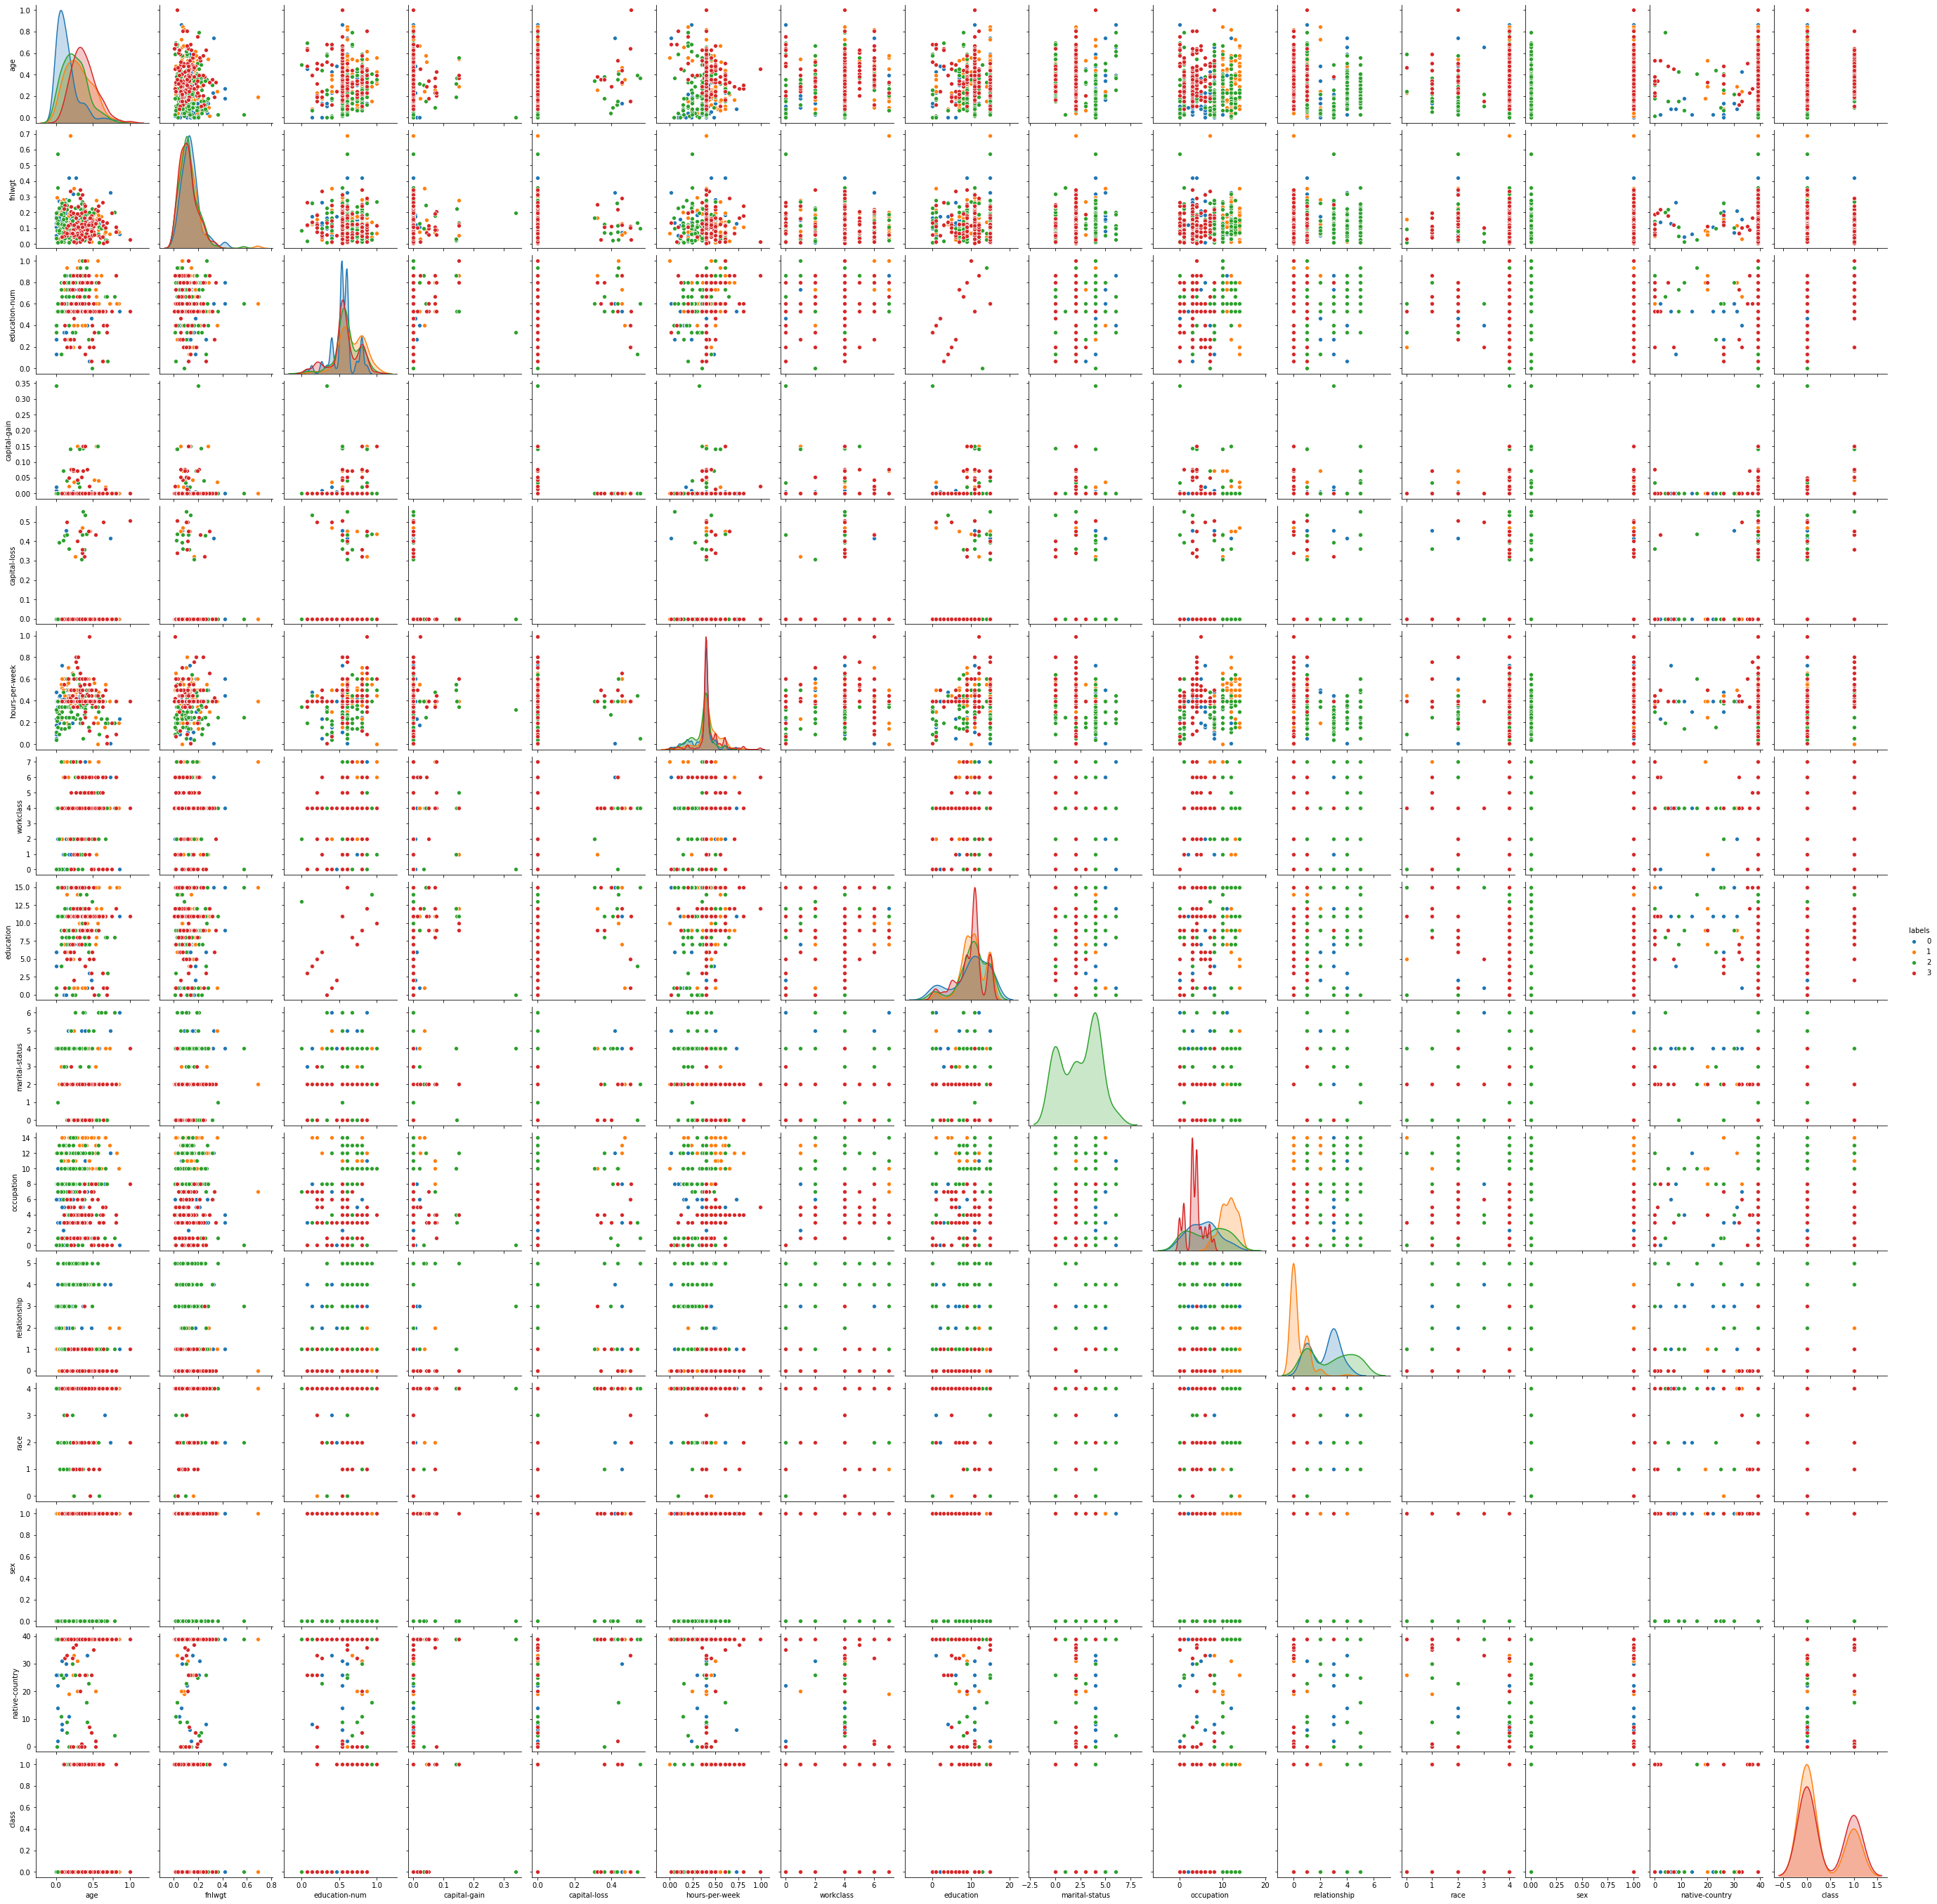

In [16]:
sns.pairplot(labeledC,hue='labels')

This is nice for scanning by eye and seeing what variables give you nice separation and getting a sense for what happened in the clusters, but there's a lot going on and it's hard to get a quick answer to questions like "what features tend to define cluster 0? How about cluster 3?" Let's try visualizing each variable separately using strip plots and swarm plots.

In [17]:
labeledC['Constant'] = "Data" #This is just to add something constant for the strip/swarm plots' X axis. Can be anything you want it to be.
labeledC

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,labels,class,Constant
0,0.452055,0.048052,0.800000,0.0,0.0,0.122449,6,9,2,4,0,4,1,39,3,0,Data
1,0.287671,0.137581,0.533333,0.0,0.0,0.397959,4,11,0,6,1,4,1,39,3,0,Data
2,0.493151,0.150486,0.400000,0.0,0.0,0.397959,4,1,2,6,0,2,1,39,3,0,Data
3,0.150685,0.220635,0.800000,0.0,0.0,0.397959,4,9,2,10,5,2,0,5,2,0,Data
4,0.273973,0.184219,0.866667,0.0,0.0,0.397959,4,12,2,4,5,4,0,39,2,0,Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.041096,0.169448,0.600000,0.0,0.0,0.397959,4,15,4,7,3,4,1,39,0,0,Data
496,0.082192,0.264406,0.133333,0.0,0.0,0.397959,4,4,4,8,3,4,1,8,0,0,Data
497,0.123288,0.035185,0.600000,0.0,0.0,0.346939,4,15,4,10,1,4,0,39,2,0,Data
498,0.753425,0.197077,0.533333,0.0,0.0,0.193878,0,11,2,0,0,4,1,39,3,0,Data


<AxesSubplot:xlabel='Constant', ylabel='occupation'>

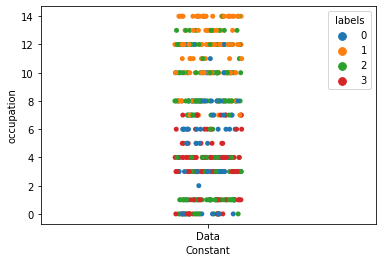

In [18]:
#education-num
sns.stripplot(x=labeledC['Constant'],y=labeledC['occupation'],hue=labeledC['labels'],jitter=True)

This is a strip plot. Seaborn plots one data point for each row and we've color coded the points by the cluster to which they were assigned. Adding jitter fans out the points horizontally. In a strip plot, the points can overlap. In a swarm plot (below), the points cannot overlap.

<AxesSubplot:xlabel='Constant', ylabel='occupation'>

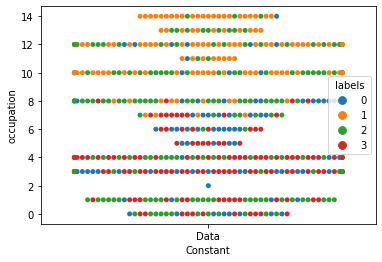

In [19]:
sns.swarmplot(x=labeledC['Constant'],y=labeledC['occupation'],hue=labeledC['labels'])

Let's look at all the features. 

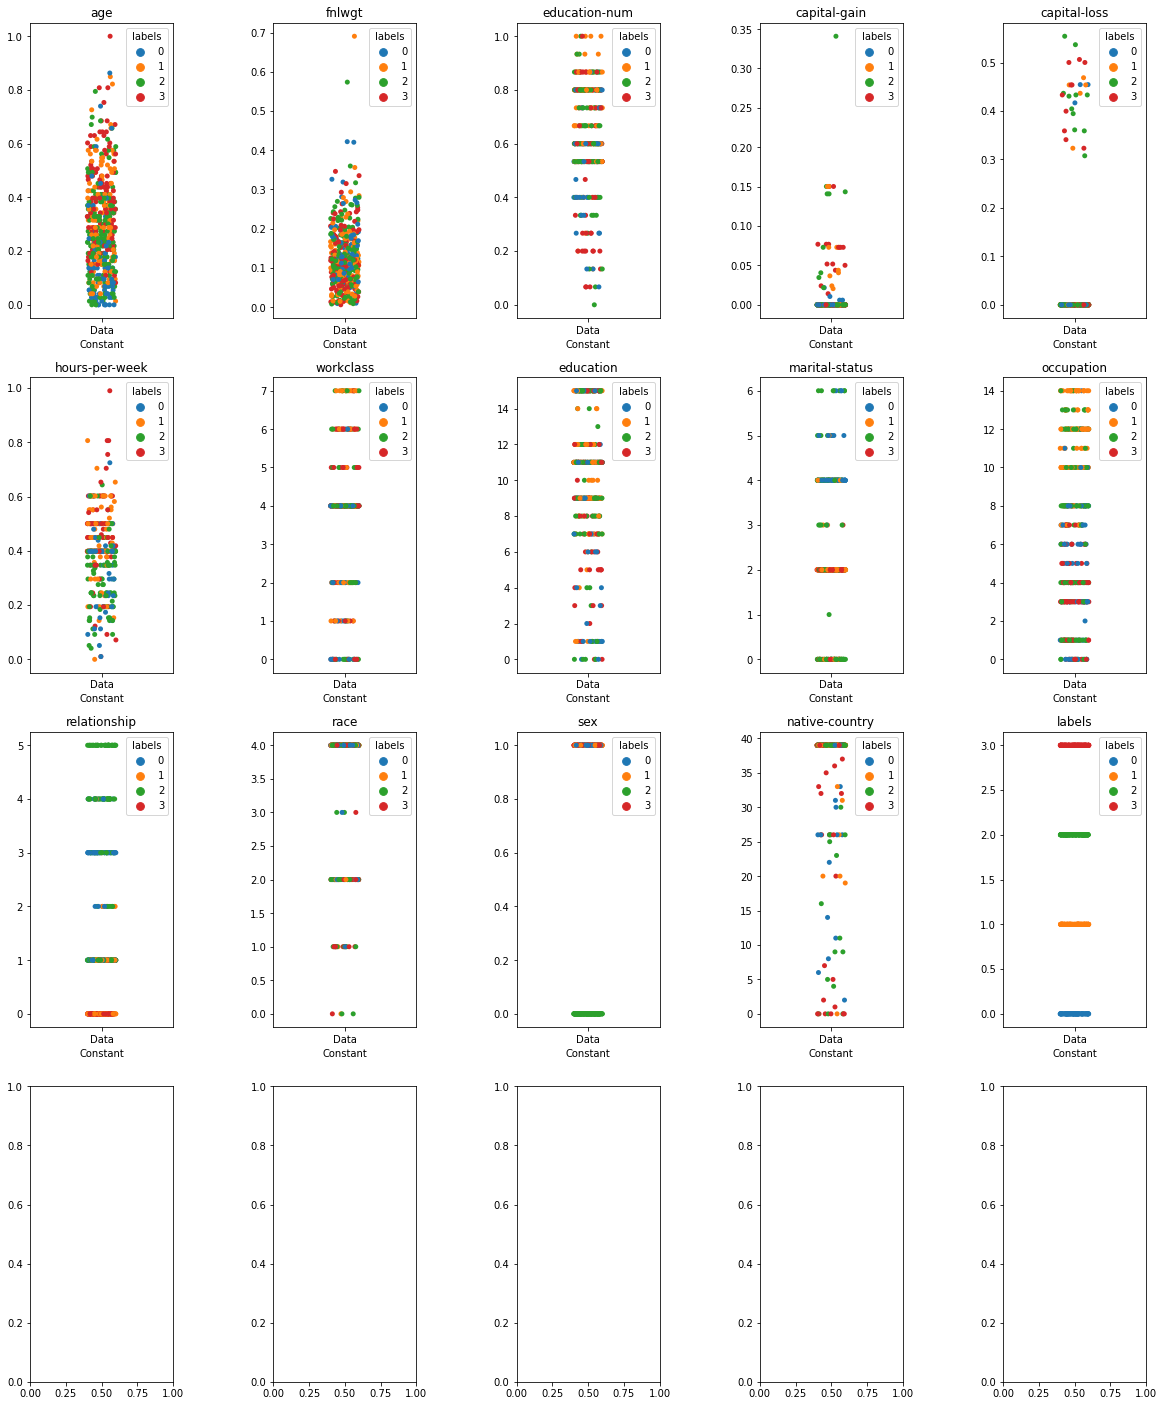

In [20]:
f, axes = plt.subplots(4, 5, figsize=(20, 25), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7) 
for i in range(0,len(list(labeledC))-2): 
    col = labeledC.columns[i]
    if i < 5:
        ax = sns.stripplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],jitter=True,ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 5 and i<10:
        ax = sns.stripplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],jitter=True,ax=axes[1,(i-5)]) #so if i=6 it is row 1 column 1
        ax.set_title(col)
    elif i >= 10 and i<15:
        ax = sns.stripplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],jitter=True,ax=axes[2,(i-10)])
        ax.set_title(col)
    elif i >= 15:
        ax = sns.stripplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],jitter=True,ax=axes[3,(i-15)])
        ax.set_title(col)

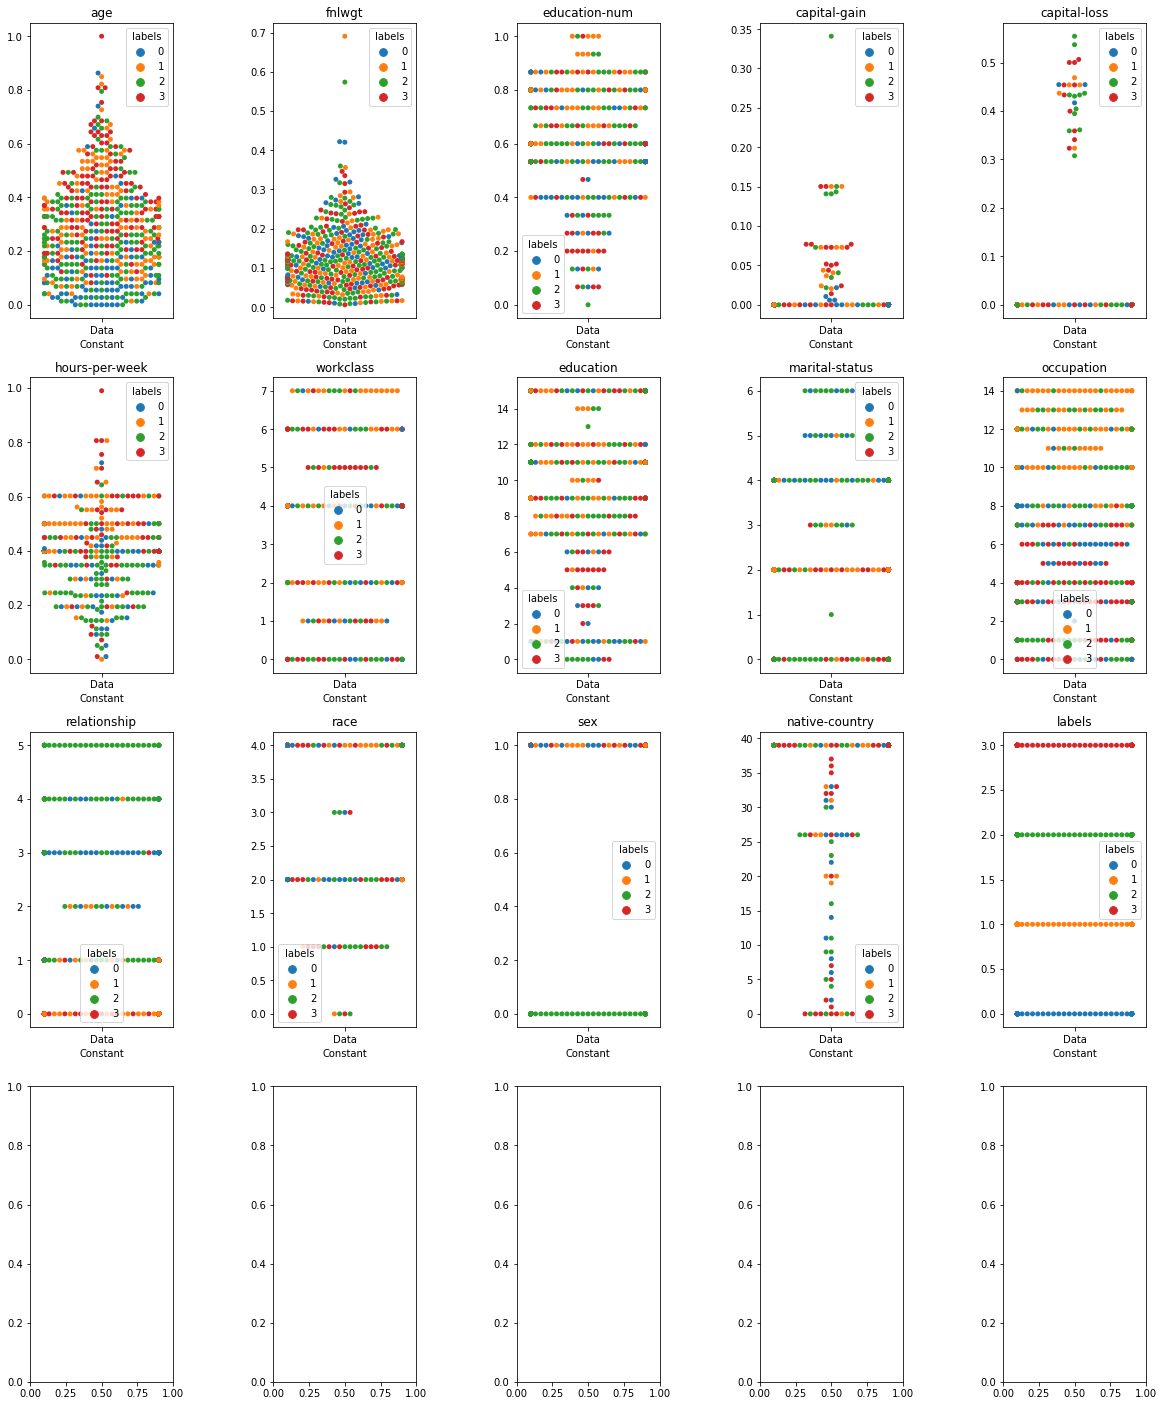

In [22]:
f, axes = plt.subplots(4, 5, figsize=(20, 25), sharex=False) 
f.subplots_adjust(hspace=0.2, wspace=0.7)
for i in range(0,len(list(labeledC))-2):
    col = labeledC.columns[i]
    if i < 5:
        ax = sns.swarmplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 5 and i<10:
        ax = sns.swarmplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],ax=axes[1,(i-5)])
        ax.set_title(col)
    elif i >= 10 and i<15:
        ax = sns.swarmplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],ax=axes[2,(i-10)])
        ax.set_title(col)
    elif i >= 15:
        ax = sns.swarmplot(x=labeledC['Constant'],y=labeledC[col].values,hue=labeledC['labels'],ax=axes[3,(i-15)])
        ax.set_title(col)